In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
import random
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('gptrain.csv')
Xtr = np.array([df['latitude'], df['longitude']]).T
Ytr = np.array(df['temperature'])

df = pd.read_csv('gptest.csv')
Xte = np.array([df['latitude'], df['longitude']]).T
Yte = np.array(df['temperature'])

In [ ]:
sigma = 1.5
Ktr = np.zeros((Xtr.shape[0], Xtr.shape[0]))
for i in range(Ktr.shape[0]):
    for j in range(Ktr.shape[1]):
        Ktr[i,j] = math.exp(-np.linalg.norm(Xtr[i] - Xtr[j])/sigma)

Kte = np.zeros((Xte.shape[0], Xte.shape[0]))
for i in range(Kte.shape[0]):
    for j in range(Kte.shape[1]):
        Kte[i,j] = math.exp(-np.linalg.norm(Xte[i] - Xte[j])/sigma)

Ktrte = np.zeros((Xtr.shape[0], Xte.shape[0]))
for i in range(Ktrte.shape[0]):
    for j in range(Ktrte.shape[1]):
        Ktrte[i,j] = math.exp(-np.linalg.norm(Xtr[i] - Xte[j])/sigma)

Ktetr = Ktrte.T

mte = np.ones(11)*20
mtr = np.ones(93)*20
postmte = mte + Ktetr @ np.linalg.inv(Ktr) @ (Ytr - mtr)

print("MSE between posterior mean and true values yte :- ", mean_squared_error(Yte, postmte))
print("MSE between true values Yte and average of Ytr:- ", mean_squared_error(Yte, np.ones(Yte.shape[0])*np.average(Ytr)))

MSE between posterior mean and true values yte :-  2.4131754463183617
MSE between true values Yte and average of Ytr:-  6.422837006905684


In [ ]:
minLat = np.min(Xtr[:,0])
maxLat = np.max(Xtr[:,0])
minLong = np.min(Xtr[:,1])
maxLong = np.max(Xtr[:,1])

n = 100

Xte = np.ones((n*n, 2))
i = 0
for lat in np.linspace(minLat, maxLat, num=n):
    for lon in np.linspace(minLong, maxLong, num=n):
        Xte[i] = [lat, lon]
        i += 1

Kte = np.zeros((Xte.shape[0], Xte.shape[0]))
for i in range(Kte.shape[0]):
    for j in range(Kte.shape[1]):
        Kte[i,j] = math.exp(-np.linalg.norm(Xte[i] - Xte[j])/sigma)

Ktrte = np.zeros((Xtr.shape[0], Xte.shape[0]))
for i in range(Ktrte.shape[0]):
    for j in range(Ktrte.shape[1]):
        Ktrte[i,j] = math.exp(-np.linalg.norm(Xtr[i] - Xte[j])/sigma)

Ktetr = Ktrte.T

mte = np.ones(n*n)*20
postmte = mte + Ktetr @ np.linalg.inv(Ktr) @ (Ytr - mtr)

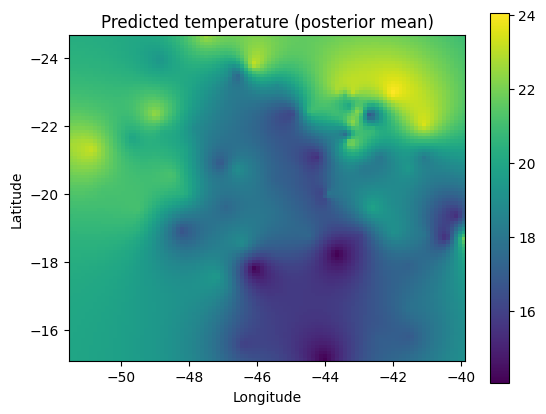

In [ ]:
Xplot = postmte.reshape((n,n))

plt.imshow(Xplot, extent=[minLong, maxLong, maxLat, minLat])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Predicted temperature (posterior mean)")
plt.colorbar()

In [ ]:
postPredMat = Kte - Ktetr @ np.linalg.inv(Ktr) @ Ktrte

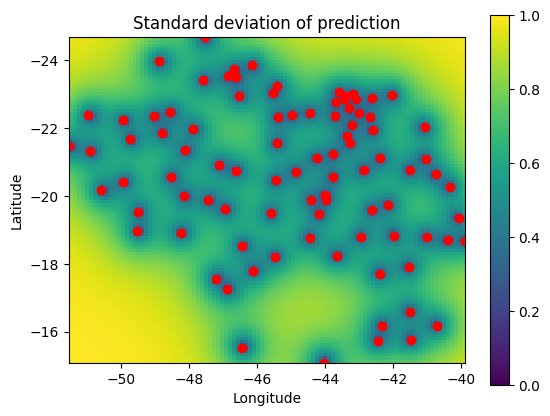

In [ ]:
Xplot = np.sqrt(postPredMat.diagonal().reshape((n,n)))

plt.imshow(Xplot, extent=[minLong, maxLong, maxLat, minLat])
plt.scatter(Xtr[:,1], Xtr[:,0], color='red')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Standard deviation of prediction")
plt.colorbar()